In [31]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit

In [35]:
N = 3 # 100x100 2D lattice, #of particles=10000

In [40]:
init_random = np.random.random((N,N)) #Gives a random number from 0.0 to 1.0 open
lattice_n = np.zeros((N,N))
lattice_n[init_random>=0.75] = 1
lattice_n[init_random<0.75] = -1

init_random = np.random.random((N,N)) #Gives a random number from 0.0 to 1.0 open
lattice_p = np.zeros((N,N))
lattice_p[init_random>=0.25] = 1
lattice_p[init_random<0.25] = -1

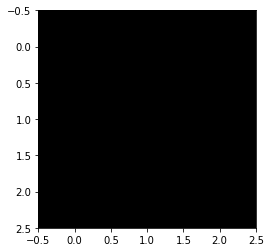

In [41]:
plt.imshow(lattice_n, cmap='gray')

In [65]:
def totalEnergy(s, h, beta):
    
    n, m = np.shape(s)
    J = 1
    B = h/beta # Field in units of energy, h is the dimensionless LDT parameter
    
    E = 0.0
        
    for j in range(n):
        for i in range(m-1):
            E -= J*s[i,j]*s[i+1,j]
    
    for j in range(n): 
        E -= J*s[m-1,j]*s[0,j]
    
    for j in range(n-1):
        for i in range(m):
            E -= J*s[i,j]*s[i,j+1] 

    for i in range(m):
        E -= J*s[i,m-1]*s[i,0] 
        
    E -= B*s.sum() # Include the external field
    
    return E 

In [66]:
totalEnergy(lattice_n, 0, 0.1)

-18.0

In [67]:
@numba.njit("UniTuple(f8[:],2)(f8[:,:], i8, f8, f8)", nopython=True, nogil=True)
def metropolis(spin_arr, times, BJ, energy):
    spin_arr = spin_arr.copy()
    net_spins = np.zeros(times-1)
    net_energy = np.zeros(times-1)
    for t in range(0,times-1):
        x = np.random.randint(0,N)
        y = np.random.randint(0,N)
        spin_i = spin_arr[x,y] #Initial spin
        spin_f = spin_i*(-1) #Proposed spin flip
        
        #Compute change in energy
        E_i = 0
        E_f = 0
        
        if x>0:
            E_i += -spin_i*spin_arr[x-1,y]
            E_f += -spin_f*spin_arr[x-1,y]
        if x<N-1:
            E_i += -spin_i*spin_arr[x+1,y]
            E_f += -spin_f*spin_arr[x+1,y]
        if y>0:
            E_i += -spin_i*spin_arr[x,y-1]
            E_f += -spin_f*spin_arr[x,y-1]
        if y<N-1:
            E_i += -spin_i*spin_arr[x,y+1]
            E_f += -spin_f*spin_arr[x,y+1]
            
        dE = E_f - E_i
        if (dE>0) and (np.random.random()<np.exp(-BJ*dE)):
            spin_arr[x,y]=spin_f
            energy += dE
        elif dE<=0:
            spin_arr[x,y]=spin_f
            energy += dE
            
        net_spins[t] = spin_arr.sum()
        net_energy[t] = energy
        
    return net_spins, net_energy

C:\ProgramData\Anaconda3\lib\site-packages\numba\decorators.py:232: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [71]:
spins, energies = metropolis(lattice_n, 500000, 0.1 , totalEnergy(lattice_n, 0, 0.1))

In [72]:
m = spins/(N*N)

In [73]:
print(m)

[-1.         -1.         -1.         ...  0.11111111 -0.11111111
  0.11111111]
